# Text Mining Assignment

In [1]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## Kindle Dataset

In [2]:
kindle = pd.read_csv('/Users/rahul/Desktop/excelr/Data Science Assignments/Text Mining/amazon_dataset1.csv',
                     encoding='latin',
                     error_bad_lines = False)
kindle

label                                               text
0         0  Not worth the money: Banks'book Oscilloscope G...
1         0  I changed my mind: When I first reviewed this ...
2         0  How quickly we fail...: I was initially enthus...
3         0  DOA Did Not Power up out of the box: DOA produ...
4         0  support: I ordered this nursing bra after look...
...     ...                                                ...
1093      1  bemused and confused......: ...by some of the ...
1094      1  Great: Small, lightweight and has pretty much ...
1095      0  Dull Bach Performances: It is hard to be enthu...
1096      1  One well done video about an amazing creature:...
1097      0  guitar case: The case itself is GREAT, but it ...

[1098 rows x 2 columns]

In [3]:
kindle = kindle['text']
kindle

0       Not worth the money: Banks'book Oscilloscope G...
1       I changed my mind: When I first reviewed this ...
2       How quickly we fail...: I was initially enthus...
3       DOA Did Not Power up out of the box: DOA produ...
4       support: I ordered this nursing bra after look...
                              ...                        
1093    bemused and confused......: ...by some of the ...
1094    Great: Small, lightweight and has pretty much ...
1095    Dull Bach Performances: It is hard to be enthu...
1096    One well done video about an amazing creature:...
1097    guitar case: The case itself is GREAT, but it ...
Name: text, Length: 1098, dtype: object

In [4]:
kindle = [y.strip() for y in kindle]
kindle

["Not worth the money: Banks'book Oscilloscope Guide uses large print and offers little information and there are mistakes...There is some useful information there but not worth the high price.",
 "I changed my mind: When I first reviewed this album two years ago, I gave it a glowing reviews. Unfortunately, the album doesn't have too much lasting value. They initially impressed me due to the vocalist's similarity to Maynard James Keenan, but the novelty of that wore thin quickly. The band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band. If they worked at developing a more unique sound, there's definite potential for greatness. But as of this record, that potential is far from fulfilled.",
 'How quickly we fail...: I was initially enthusiastic about these "scabs". I followed the instructions carefully but in two repairs, both failed. Don\'t let these strand you somewhere--they may seem to be working at first. It took 2 weeks for my repairs t

In [5]:
kindle = [x for x in kindle if x] 
kindle

["Not worth the money: Banks'book Oscilloscope Guide uses large print and offers little information and there are mistakes...There is some useful information there but not worth the high price.",
 "I changed my mind: When I first reviewed this album two years ago, I gave it a glowing reviews. Unfortunately, the album doesn't have too much lasting value. They initially impressed me due to the vocalist's similarity to Maynard James Keenan, but the novelty of that wore thin quickly. The band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band. If they worked at developing a more unique sound, there's definite potential for greatness. But as of this record, that potential is far from fulfilled.",
 'How quickly we fail...: I was initially enthusiastic about these "scabs". I followed the instructions carefully but in two repairs, both failed. Don\'t let these strand you somewhere--they may seem to be working at first. It took 2 weeks for my repairs t

In [6]:
# Joining the list into one string/text
text = ' '.join(kindle)
text

'Not worth the money: Banks\'book Oscilloscope Guide uses large print and offers little information and there are mistakes...There is some useful information there but not worth the high price. I changed my mind: When I first reviewed this album two years ago, I gave it a glowing reviews. Unfortunately, the album doesn\'t have too much lasting value. They initially impressed me due to the vocalist\'s similarity to Maynard James Keenan, but the novelty of that wore thin quickly. The band doesn\'t have too much aside from that to back them up, leaving a rather average nu-metal band. If they worked at developing a more unique sound, there\'s definite potential for greatness. But as of this record, that potential is far from fulfilled. How quickly we fail...: I was initially enthusiastic about these "scabs". I followed the instructions carefully but in two repairs, both failed. Don\'t let these strand you somewhere--they may seem to be working at first. It took 2 weeks for my repairs to pr

In [7]:
#Punctuation
no_punc_text = text.translate(str.maketrans("", "", string.punctuation)) 
no_punc_text

'Not worth the money Banksbook Oscilloscope Guide uses large print and offers little information and there are mistakesThere is some useful information there but not worth the high price I changed my mind When I first reviewed this album two years ago I gave it a glowing reviews Unfortunately the album doesnt have too much lasting value They initially impressed me due to the vocalists similarity to Maynard James Keenan but the novelty of that wore thin quickly The band doesnt have too much aside from that to back them up leaving a rather average numetal band If they worked at developing a more unique sound theres definite potential for greatness But as of this record that potential is far from fulfilled How quickly we fail I was initially enthusiastic about these scabs I followed the instructions carefully but in two repairs both failed Dont let these strand you somewherethey may seem to be working at first It took 2 weeks for my repairs to prove futile Oh well back to the drawing boar

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['Not',
 'worth',
 'the',
 'money',
 'Banksbook',
 'Oscilloscope',
 'Guide',
 'uses',
 'large',
 'print',
 'and',
 'offers',
 'little',
 'information',
 'and',
 'there',
 'are',
 'mistakesThere',
 'is',
 'some',
 'useful',
 'information',
 'there',
 'but',
 'not',
 'worth',
 'the',
 'high',
 'price',
 'I',
 'changed',
 'my',
 'mind',
 'When',
 'I',
 'first',
 'reviewed',
 'this',
 'album',
 'two',
 'years',
 'ago',
 'I',
 'gave',
 'it',
 'a',
 'glowing',
 'reviews',
 'Unfortunately',
 'the',
 'album',
 'doesnt',
 'have',
 'too',
 'much',
 'lasting',
 'value',
 'They',
 'initially',
 'impressed',
 'me',
 'due',
 'to',
 'the',
 'vocalists',
 'similarity',
 'to',
 'Maynard',
 'James',
 'Keenan',
 'but',
 'the',
 'novelty',
 'of',
 'that',
 'wore',
 'thin',
 'quickly',
 'The',
 'band',
 'doesnt',
 'have',
 'too',
 'much',
 'aside',
 'from',
 'that',
 'to',
 'back',
 'them',
 'up',
 'leaving',
 'a',
 'rather',
 'average',
 'numetal',
 'band',
 'If',
 'they',
 'worked',
 'at',
 'developing',

In [9]:
text_tokens[0:72]

['Not',
 'worth',
 'the',
 'money',
 'Banksbook',
 'Oscilloscope',
 'Guide',
 'uses',
 'large',
 'print',
 'and',
 'offers',
 'little',
 'information',
 'and',
 'there',
 'are',
 'mistakesThere',
 'is',
 'some',
 'useful',
 'information',
 'there',
 'but',
 'not',
 'worth',
 'the',
 'high',
 'price',
 'I',
 'changed',
 'my',
 'mind',
 'When',
 'I',
 'first',
 'reviewed',
 'this',
 'album',
 'two',
 'years',
 'ago',
 'I',
 'gave',
 'it',
 'a',
 'glowing',
 'reviews',
 'Unfortunately',
 'the',
 'album',
 'doesnt',
 'have',
 'too',
 'much',
 'lasting',
 'value',
 'They',
 'initially',
 'impressed',
 'me',
 'due',
 'to',
 'the',
 'vocalists',
 'similarity',
 'to',
 'Maynard',
 'James',
 'Keenan',
 'but',
 'the']

In [10]:
len(text_tokens)

84100

In [11]:
from nltk.corpus import stopwords

In [12]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['Not', 'worth', 'money', 'Banksbook', 'Oscilloscope', 'Guide', 'uses', 'large', 'print', 'offers', 'little', 'information', 'mistakesThere', 'useful', 'information', 'worth', 'high', 'price', 'I', 'changed', 'mind', 'When', 'I', 'first', 'reviewed', 'album', 'two', 'years', 'ago', 'I', 'gave', 'glowing', 'reviews', 'Unfortunately', 'album', 'doesnt', 'much', 'lasting', 'value', 'They', 'initially', 'impressed', 'due', 'vocalists', 'similarity', 'Maynard', 'James', 'Keenan', 'novelty', 'wore', 'thin', 'quickly', 'The', 'band', 'doesnt', 'much', 'aside', 'back', 'leaving', 'rather', 'average', 'numetal', 'band', 'If', 'worked']


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['not', 'worth', 'money', 'banksbook', 'oscilloscope', 'guide', 'uses', 'large', 'print', 'offers', 'little', 'information', 'mistakesthere', 'useful', 'information', 'worth', 'high', 'price', 'i', 'changed', 'mind', 'when', 'i', 'first', 'reviewed', 'album', 'two', 'years', 'ago', 'i', 'gave', 'glowing', 'reviews', 'unfortunately', 'album', 'doesnt', 'much', 'lasting', 'value', 'they', 'initially', 'impressed', 'due', 'vocalists', 'similarity']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['not', 'worth', 'money', 'banksbook', 'oscilloscop', 'guid', 'use', 'larg', 'print', 'offer', 'littl', 'inform', 'mistakesther', 'use', 'inform', 'worth', 'high', 'price', 'i', 'chang', 'mind', 'when', 'i', 'first', 'review', 'album', 'two', 'year', 'ago', 'i', 'gave', 'glow', 'review', 'unfortun', 'album', 'doesnt', 'much', 'last', 'valu', 'they']


In [16]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [17]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Not worth money Banksbook Oscilloscope Guide uses large print offers little information mistakesThere useful information worth high price I changed mind When I first reviewed album two years ago I gave glowing reviews Unfortunately album doesnt much lasting value


In [18]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['not', 'worth', 'money', 'Banksbook', 'Oscilloscope', 'Guide', 'use', 'large', 'print', 'offer', 'little', 'information', 'mistakesthere', 'useful', 'information', 'worth', 'high', 'price', 'I', 'change', 'mind', 'when']


### Feature Extraction :

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [20]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

not  worth  money  banksbook  oscilloscope  guide   use  large  print  \
0  5640   9120   5362        829          5848   3734  8708   4731   6394   

   offer  ...  regularly  tempi  rille  suzuki  gardiner  clincher  clot  \
0   5735  ...       6759   8136   6964    8006      3496      1651  1665   

   choral  crab  turtle  
0    1566  1995    8529  

[1 rows x 9232 columns]

In [21]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
not           5640
worth         9120
money         5362
banksbook      829
oscilloscope  5848
...            ...
clincher      1651
clot          1665
choral        1566
crab          1995
turtle        8529

[9232 rows x 1 columns]

In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
zweig                       9231
zune                        9230
zumba                       9229
zoom                        9228
zooey                       9227
zone                        9226
zombie                      9225
zoe                         9224
zip                         9223
zinmans                     9222
zing                        9221
zero                        9220
zergling                    9219
zerg                        9218
zepplin                     9217
zenith                      9216
zeisss                      9215
zao                         9214
zakk                        9213
zagg                        9212
yyyyyyyeeeeeeeeeeeaaaaahhh  9211
yvette                      9210
yummy                       9209
yum                         9208
yuck                        9207
yr                          9206
yoyo                        9205
youthese                    9204
youthe                      9203
youth                       9202

In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
05             0
10             1
100            2
1000           3
10000          4
1001           5
100crap        6
100yr          7
1027           8
1080p          9
10characters  10
10days        11
10gameplay    12
10k           13
10this        14
11            15
1100          16
112000        17
12            18
1200          19
120yr         20
1234          21
13            22
130           23
13000         24

In [24]:
print(vectorizer.vocabulary_)

{'not': 5640, 'worth': 9120, 'money': 5362, 'banksbook': 829, 'oscilloscope': 5848, 'guide': 3734, 'use': 8708, 'large': 4731, 'print': 6394, 'offer': 5735, 'little': 4901, 'information': 4267, 'mistakesthere': 5328, 'useful': 8711, 'high': 3934, 'price': 6385, 'change': 1474, 'mind': 5283, 'when': 8985, 'first': 3249, 'review': 6909, 'album': 395, 'two': 8543, 'year': 9169, 'ago': 358, 'give': 3579, 'glow': 3597, 'unfortunately': 8611, 'do': 2512, 'nt': 5672, 'much': 5441, 'lasting': 4738, 'value': 8738, 'they': 8235, 'initially': 4278, 'impress': 4189, 'due': 2651, 'vocalist': 8830, 'similarity': 7438, 'maynard': 5145, 'james': 4474, 'keenan': 4602, 'novelty': 5662, 'wear': 8922, 'thin': 8239, 'quickly': 6561, 'the': 8196, 'band': 820, 'aside': 656, 'back': 770, 'leave': 4785, 'rather': 6616, 'average': 740, 'numetal': 5685, 'if': 4140, 'work': 9104, 'develop': 2343, 'unique': 8626, 'sound': 7641, 'there': 8220, 'definite': 2237, 'potential': 6301, 'greatness': 3686, 'but': 1283, 're

In [25]:
print(vectorizer.get_feature_names()[50:100])

['1960', '1972', '1974', '1980', '1981', '1986', '1988', '1990', '1995', '1996', '1997', '1omyhs', '1product', '1st', '1star', '20', '200', '2000', '2000grs', '2002', '2003', '2004', '2006', '2007', '2008', '200mhz', '2010', '2011', '2012', '2012amazon', '2025', '2030', '2040', '207', '20mins', '20th', '21', '213', '21st', '22', '225bw', '22inch', '23', '24', '246', '2461', '25', '2500', '25originalwe', '26']


In [26]:
#print(X.toarray()[50:100])

In [27]:
#print(X.toarray().shape)

#### Let's see how can bigrams and trigrams can be included here

In [28]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(kindle)
bow_matrix_ngram

<1098x100 sparse matrix of type '<class 'numpy.int64'>'
	with 24573 stored elements in Compressed Sparse Row format>

In [29]:
print(vectorizer_ngram_range.get_feature_names())

['about', 'after', 'all', 'an', 'and', 'and the', 'are', 'as', 'at', 'be', 'because', 'been', 'best', 'better', 'book', 'but', 'buy', 'by', 'can', 'cd', 'do', 'don', 'even', 'first', 'for', 'for the', 'from', 'get', 'good', 'great', 'had', 'has', 'have', 'he', 'her', 'his', 'how', 'if', 'if you', 'in', 'in the', 'is', 'it', 'it is', 'it was', 'just', 'like', 'love', 'me', 'more', 'movie', 'much', 'my', 'no', 'not', 'of', 'of the', 'on', 'on the', 'one', 'only', 'or', 'other', 'out', 'product', 'read', 'really', 'she', 'so', 'some', 'than', 'that', 'the', 'their', 'them', 'there', 'these', 'they', 'this', 'this book', 'this is', 'time', 'to', 'to be', 'to the', 'up', 'use', 'very', 'was', 'we', 'well', 'were', 'what', 'when', 'who', 'will', 'with', 'would', 'you', 'your']


In [30]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer :

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(kindle)

In [32]:
print(vectorizer_n_gram_max_features.get_feature_names())

['about', 'after', 'all', 'an', 'and', 'and the', 'are', 'as', 'at', 'be', 'because', 'been', 'best', 'better', 'book', 'but', 'buy', 'by', 'can', 'cd', 'do', 'don', 'even', 'first', 'for', 'for the', 'from', 'get', 'good', 'great', 'had', 'has', 'have', 'he', 'her', 'his', 'how', 'if', 'if you', 'in', 'in the', 'is', 'it', 'it is', 'it was', 'just', 'like', 'love', 'me', 'more', 'movie', 'much', 'my', 'no', 'not', 'of', 'of the', 'on', 'on the', 'one', 'only', 'or', 'other', 'out', 'product', 'read', 'really', 'she', 'so', 'some', 'than', 'that', 'the', 'their', 'them', 'there', 'these', 'they', 'this', 'this book', 'this is', 'time', 'to', 'to be', 'to the', 'up', 'use', 'very', 'was', 'we', 'well', 'were', 'what', 'when', 'who', 'will', 'with', 'would', 'you', 'your']


In [33]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.71388892 0.         0.         ... 0.         2.04891262 0.        ]
 ...
 [2.71388892 0.         2.50498773 ... 0.         0.         0.        ]
 [2.71388892 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


####  Generate wordcloud :

In [34]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

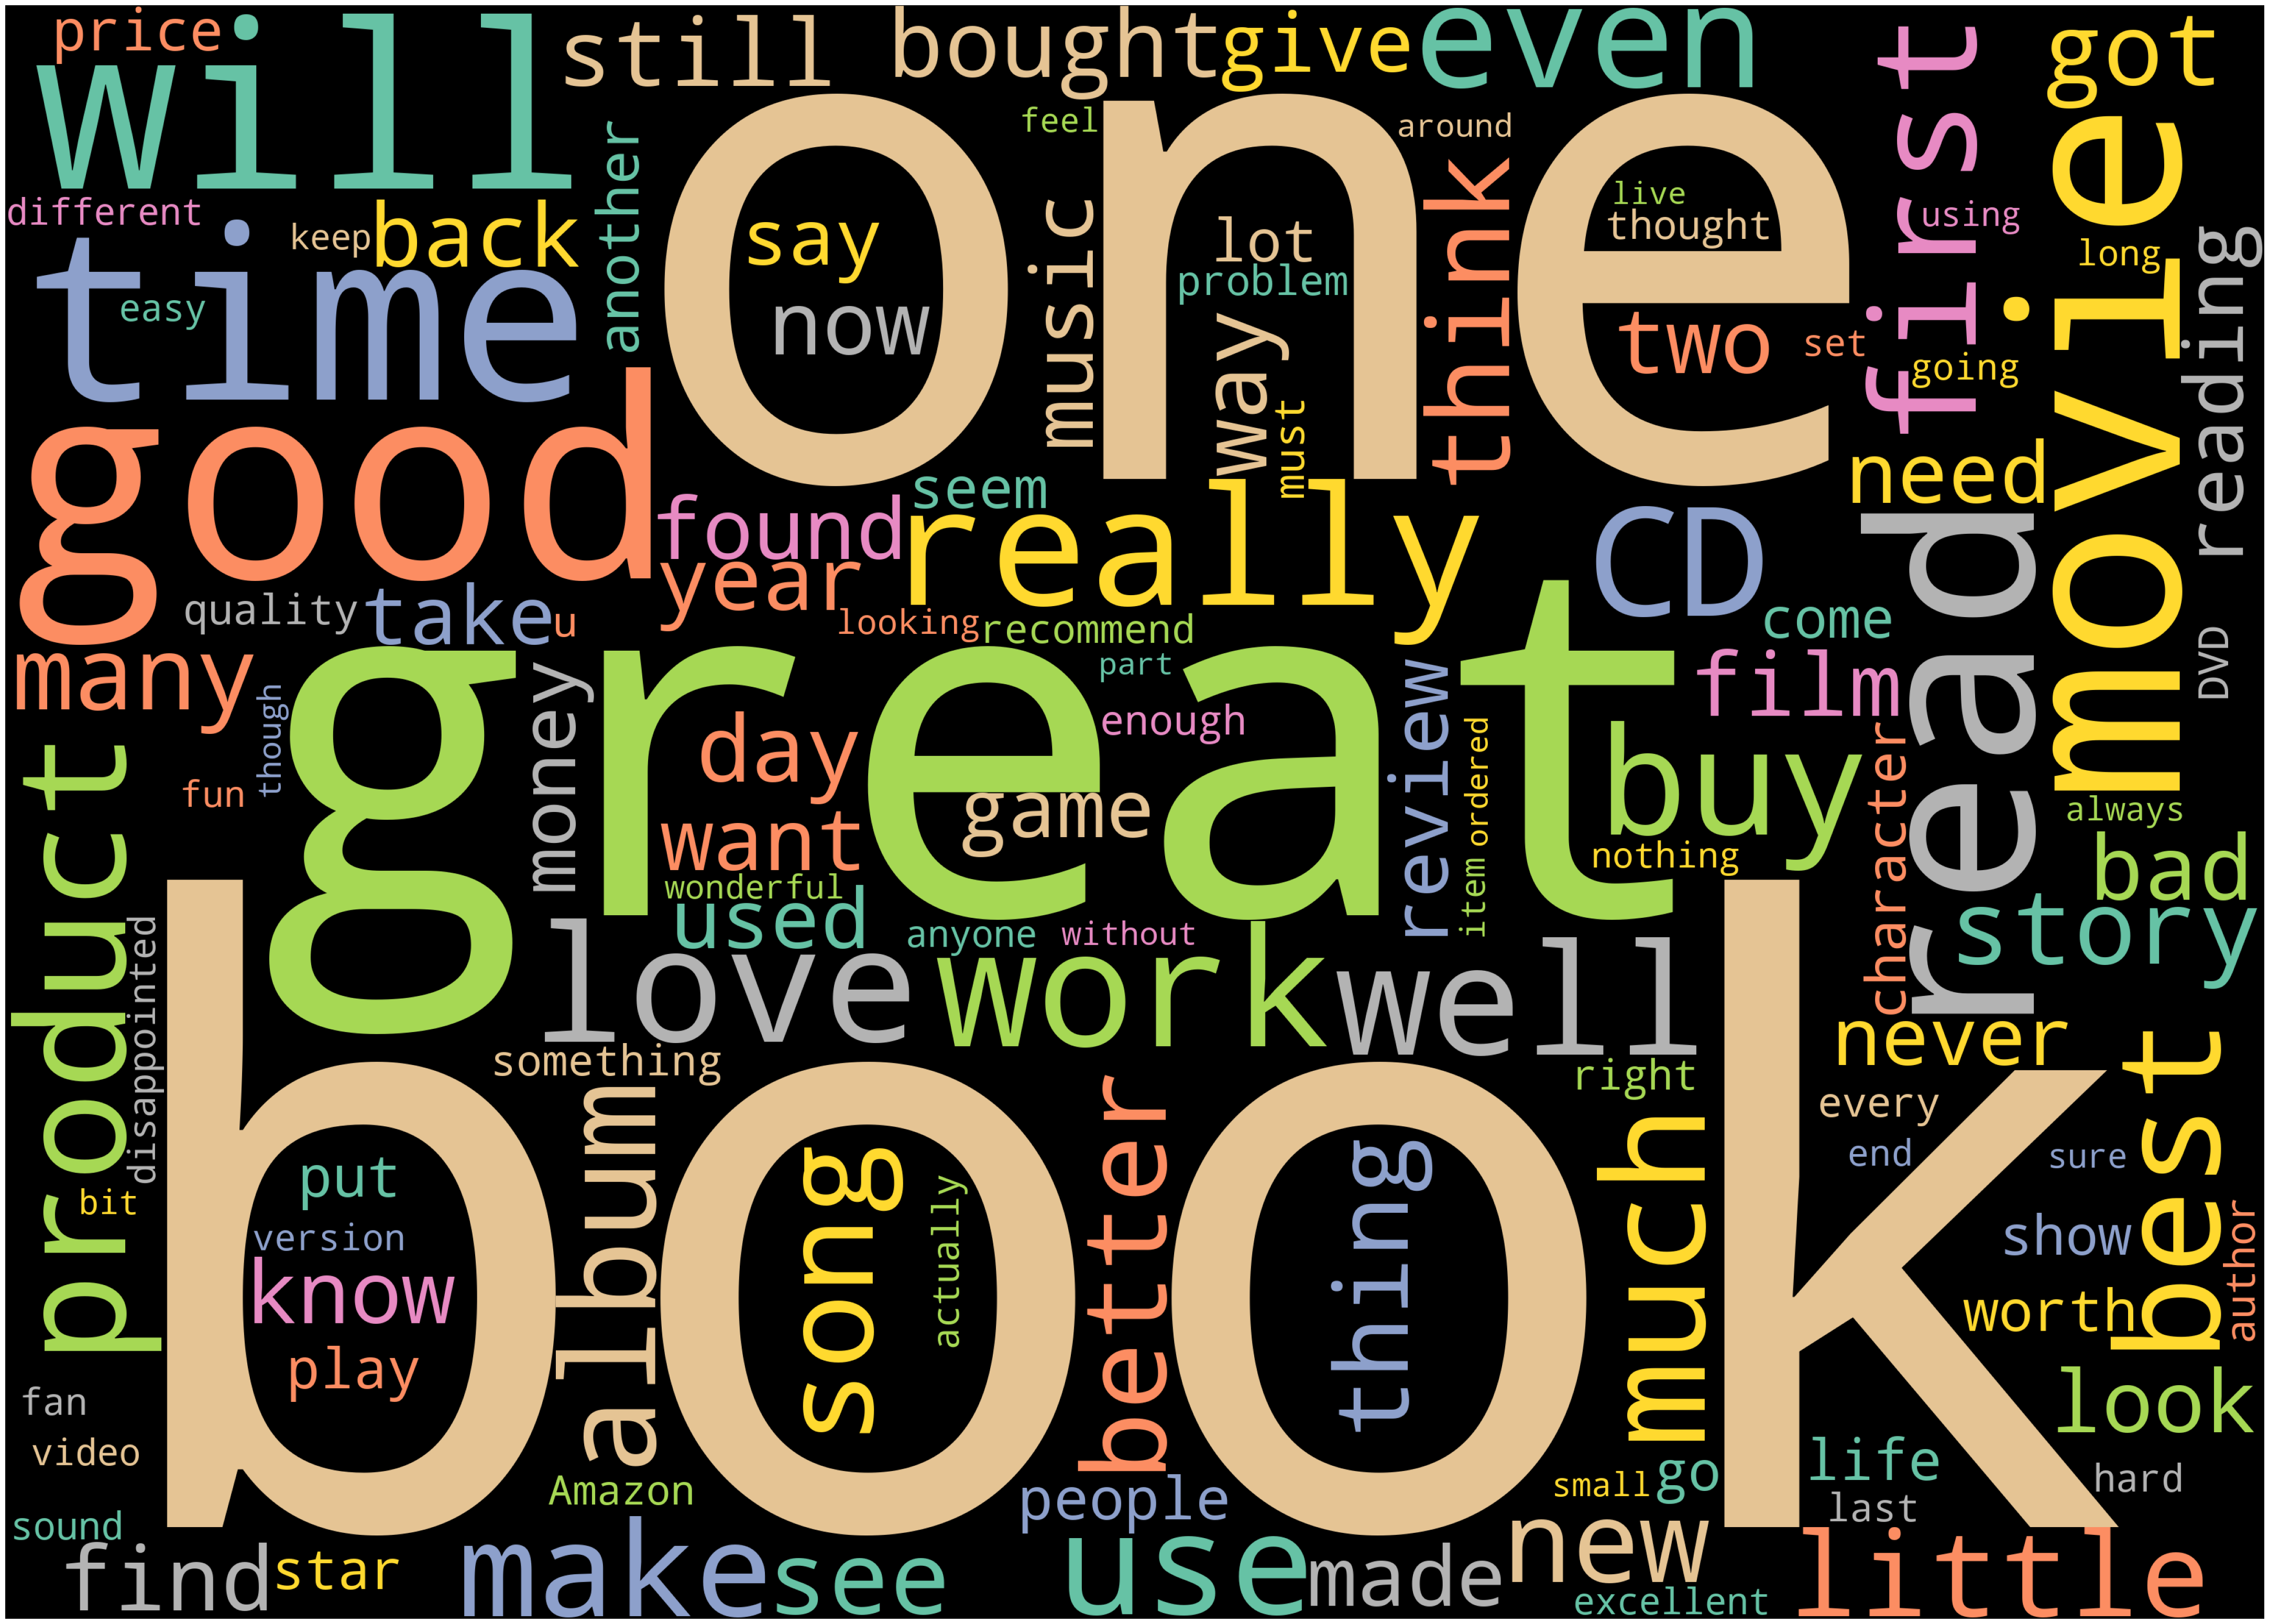

In [35]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [36]:
kindle2 = pd.read_csv('/Users/rahul/Desktop/excelr/Data Science Assignments/Text Mining/amazon_dataset1.csv', encoding='latin', error_bad_lines = False)
kindle2

label                                               text
0         0  Not worth the money: Banks'book Oscilloscope G...
1         0  I changed my mind: When I first reviewed this ...
2         0  How quickly we fail...: I was initially enthus...
3         0  DOA Did Not Power up out of the box: DOA produ...
4         0  support: I ordered this nursing bra after look...
...     ...                                                ...
1093      1  bemused and confused......: ...by some of the ...
1094      1  Great: Small, lightweight and has pretty much ...
1095      0  Dull Bach Performances: It is hard to be enthu...
1096      1  One well done video about an amazing creature:...
1097      0  guitar case: The case itself is GREAT, but it ...

[1098 rows x 2 columns]

In [37]:
kindle2 = kindle2['text']
kindle2

0       Not worth the money: Banks'book Oscilloscope G...
1       I changed my mind: When I first reviewed this ...
2       How quickly we fail...: I was initially enthus...
3       DOA Did Not Power up out of the box: DOA produ...
4       support: I ordered this nursing bra after look...
                              ...                        
1093    bemused and confused......: ...by some of the ...
1094    Great: Small, lightweight and has pretty much ...
1095    Dull Bach Performances: It is hard to be enthu...
1096    One well done video about an amazing creature:...
1097    guitar case: The case itself is GREAT, but it ...
Name: text, Length: 1098, dtype: object

In [38]:
kindle2 = [x.strip() for x in kindle2] # remove both the leading and the trailing characters
kindle2 = [x for x in kindle2 if x] # removes empty strings, because they are considered in Python as False
kindle2[0:10]

["Not worth the money: Banks'book Oscilloscope Guide uses large print and offers little information and there are mistakes...There is some useful information there but not worth the high price.",
 "I changed my mind: When I first reviewed this album two years ago, I gave it a glowing reviews. Unfortunately, the album doesn't have too much lasting value. They initially impressed me due to the vocalist's similarity to Maynard James Keenan, but the novelty of that wore thin quickly. The band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band. If they worked at developing a more unique sound, there's definite potential for greatness. But as of this record, that potential is far from fulfilled.",
 'How quickly we fail...: I was initially enthusiastic about these "scabs". I followed the instructions carefully but in two repairs, both failed. Don\'t let these strand you somewhere--they may seem to be working at first. It took 2 weeks for my repairs t

In [39]:
one_block = kindle2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [40]:
one_block

"I changed my mind: When I first reviewed this album two years ago, I gave it a glowing reviews. Unfortunately, the album doesn't have too much lasting value. They initially impressed me due to the vocalist's similarity to Maynard James Keenan, but the novelty of that wore thin quickly. The band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band. If they worked at developing a more unique sound, there's definite potential for greatness. But as of this record, that potential is far from fulfilled."

In [41]:
for token in doc_block[:]:
    print(token, token.pos_)

I PRON
changed VERB
my PRON
mind NOUN
: PUNCT
When SCONJ
I PRON
first ADV
reviewed VERB
this DET
album NOUN
two NUM
years NOUN
ago ADV
, PUNCT
I PRON
gave VERB
it PRON
a DET
glowing VERB
reviews NOUN
. PUNCT
Unfortunately ADV
, PUNCT
the DET
album NOUN
does AUX
n't PART
have VERB
too ADV
much ADJ
lasting ADJ
value NOUN
. PUNCT
They PRON
initially ADV
impressed VERB
me PRON
due ADP
to ADP
the DET
vocalist NOUN
's PART
similarity NOUN
to ADP
Maynard PROPN
James PROPN
Keenan PROPN
, PUNCT
but CCONJ
the DET
novelty NOUN
of ADP
that PRON
wore VERB
thin ADV
quickly ADV
. PUNCT
The DET
band NOUN
does AUX
n't PART
have VERB
too ADV
much ADJ
aside ADV
from ADP
that PRON
to PART
back VERB
them PRON
up ADP
, PUNCT
leaving VERB
a DET
rather ADV
average ADJ
nu ADJ
- PUNCT
metal NOUN
band NOUN
. PUNCT
If SCONJ
they PRON
worked VERB
at ADP
developing VERB
a DET
more ADV
unique ADJ
sound NOUN
, PUNCT
there PRON
's VERB
definite ADJ
potential NOUN
for ADP
greatness NOUN
. PUNCT
But CCONJ
as ADP
of ADP


In [42]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['changed',
 'mind',
 'reviewed',
 'album',
 'years',
 'gave',
 'glowing',
 'reviews',
 'album',
 'have',
 'value',
 'impressed',
 'vocalist',
 'similarity',
 'novelty',
 'wore',
 'band',
 'have',
 'back',
 'leaving',
 'metal',
 'band',
 'worked',
 'developing',
 'sound',
 "'s",
 'potential',
 'greatness',
 'record',
 'potential',
 'fulfilled']

In [43]:
len(nouns_verbs)

31

In [44]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<31x26 sparse matrix of type '<class 'numpy.int64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [45]:
X.shape

(31, 26)

In [46]:
X.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [47]:
cv.get_feature_names()

['album',
 'back',
 'band',
 'changed',
 'developing',
 'fulfilled',
 'gave',
 'glowing',
 'greatness',
 'have',
 'impressed',
 'leaving',
 'metal',
 'mind',
 'novelty',
 'potential',
 'record',
 'reviewed',
 'reviews',
 'similarity',
 'sound',
 'value',
 'vocalist',
 'wore',
 'worked',
 'years']

In [48]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

album  back  band  changed  developing  fulfilled  gave  glowing  \
0       0     0     0        1           0          0     0        0   
1       0     0     0        0           0          0     0        0   
2       0     0     0        0           0          0     0        0   
3       1     0     0        0           0          0     0        0   
4       0     0     0        0           0          0     0        0   
5       0     0     0        0           0          0     1        0   
6       0     0     0        0           0          0     0        1   
7       0     0     0        0           0          0     0        0   
8       1     0     0        0           0          0     0        0   
9       0     0     0        0           0          0     0        0   
10      0     0     0        0           0          0     0        0   
11      0     0     0        0           0          0     0        0   
12      0     0     0        0           0          0     0        0   
13      0     0     0        0           0          0     0        0   
14      0     0     0        0           0          0     0        0   
15      0     0     0        0           0          0     0        0   
16      0     0     1        0           0          0     0        0   
17      0     0     0        0           0          0     0        0   
18      0     1     0        0           0          0     0        0   
19      0     0     0        0           0          0     0        0   
20      0     0     0        0           0          0     0        0   
21      0     0     1        0           0          0     0        0   
22      0     0     0        0           0          0     0        0   
23      0     0     0        0           1          0     0        0   
24      0     0     0        0           0          0     0        0   
25      0     0     0        0           0          0     0        0   
26      0     0     0        0           0          0     0        0   
27      0     0     0        0           0          0     0        0   
28      0     0     0        0           0          0     0        0   
29      0     0     0        0           0          0     0        0   
30      0     0     0        0           0          1     0        0   

    greatness  have  ...  record  reviewed  reviews  similarity  sound  value  \
0           0     0  ...       0         0        0           0      0      0   
1           0     0  ...       0         0        0           0      0      0   
2           0     0  ...       0         1        0           0      0      0   
3           0     0  ...       0         0        0           0      0      0   
4           0     0  ...       0         0        0           0      0      0   
5           0     0  ...       0         0        0           0      0      0   
6           0     0  ...       0         0        0           0      0      0   
7           0     0  ...       0         0        1           0      0      0   
8           0     0  ...       0         0        0           0      0      0   
9           0     1  ...       0         0        0           0      0      0   
10          0     0  ...       0         0        0           0      0      1   
11          0     0  ...       0         0        0           0      0      0   
12          0     0  ...       0         0        0           0      0      0   
13          0     0  ...       0         0        0           1      0      0   
14          0     0  ...       0         0        0           0      0      0   
15          0     0  ...       0         0        0           0      0      0   
16          0     0  ...       0         0        0           0      0      0   
17          0     1  ...       0         0        0           0      0      0   
18          0     0  ...       0         0        0           0      0      0   
19          0     0  ...       0         0        0           0      0      0  

In [49]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]], dtype=int64)

In [50]:
type(sum_words)

numpy.matrix

In [51]:
cv.vocabulary_

{'changed': 3,
 'mind': 13,
 'reviewed': 17,
 'album': 0,
 'years': 25,
 'gave': 6,
 'glowing': 7,
 'reviews': 18,
 'have': 9,
 'value': 21,
 'impressed': 10,
 'vocalist': 22,
 'similarity': 19,
 'novelty': 14,
 'wore': 23,
 'band': 2,
 'back': 1,
 'leaving': 11,
 'metal': 12,
 'worked': 24,
 'developing': 4,
 'sound': 20,
 'potential': 15,
 'greatness': 8,
 'record': 16,
 'fulfilled': 5}

In [52]:
sorted(cv.vocabulary_)

['album',
 'back',
 'band',
 'changed',
 'developing',
 'fulfilled',
 'gave',
 'glowing',
 'greatness',
 'have',
 'impressed',
 'leaving',
 'metal',
 'mind',
 'novelty',
 'potential',
 'record',
 'reviewed',
 'reviews',
 'similarity',
 'sound',
 'value',
 'vocalist',
 'wore',
 'worked',
 'years']

In [53]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

word  count
0        album      2
1         back      1
2         band      2
3      changed      1
4   developing      1
5    fulfilled      1
6         gave      1
7      glowing      1
8    greatness      1
9         have      2
10   impressed      1
11     leaving      1
12       metal      1
13        mind      1
14     novelty      1
15   potential      2
16      record      1
17    reviewed      1
18     reviews      1
19  similarity      1
20       sound      1
21       value      1
22    vocalist      1
23        wore      1
24      worked      1
25       years      1

#### Visualizing results :

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

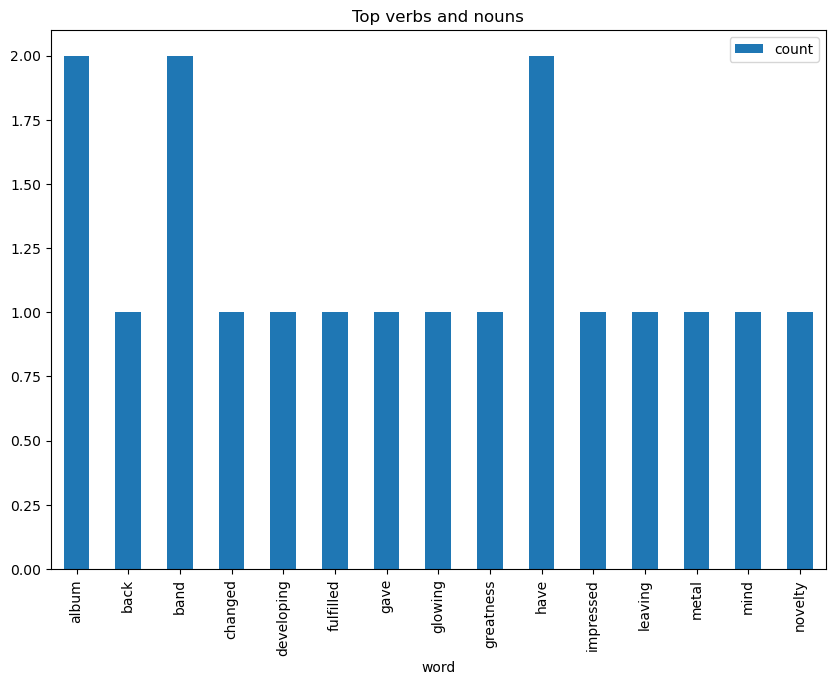

In [54]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

#### Emotion Mining :

In [55]:
#Sentiment analysis
afinn = pd.read_csv('/Users/rahul/Desktop/excelr/Data Science Assignments/Text Mining/Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [56]:
afinn[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [57]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(kindle2))

#sentences[5:15]
sentences

["Not worth the money: Banks'book Oscilloscope Guide uses large print and offers little information and there are mistakes...There is some useful information there but not worth the high price.",
 'I changed my mind: When I first reviewed this album two years ago, I gave it a glowing reviews.',
 "Unfortunately, the album doesn't have too much lasting value.",
 "They initially impressed me due to the vocalist's similarity to Maynard James Keenan, but the novelty of that wore thin quickly.",
 "The band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band.",
 "If they worked at developing a more unique sound, there's definite potential for greatness.",
 'But as of this record, that potential is far from fulfilled.',
 'How quickly we fail...: I was initially enthusiastic about these "scabs".',
 'I followed the instructions carefully but in two repairs, both failed.',
 "Don't let these strand you somewhere--they may seem to be working at first.",
 'I

In [58]:

sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0     Not worth the money: Banks'book Oscilloscope G...
1     I changed my mind: When I first reviewed this ...
2     Unfortunately, the album doesn't have too much...
3     They initially impressed me due to the vocalis...
4     The band doesn't have too much aside from that...
...                                                 ...
5178  Living on the coast brings us close to this In...
5179            Wonderful viewing for the whole family.
5180      No guns, just a crab being eaten by a turtle.
5181  guitar case: The case itself is GREAT, but it ...
5182                                       Frustrating.

[5183 rows x 1 columns]

In [59]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [60]:
nlp = spacy.load('en_core_web_sm')

In [61]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [62]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [63]:
calculate_sentiment(text = 'wonderful session')

4

In [64]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [65]:
calculate_sentiment(text = 'good')

3

In [66]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [67]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [68]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [69]:
sent_df

sentence  sentiment_value
0     Not worth the money: Banks'book Oscilloscope G...                4
1     I changed my mind: When I first reviewed this ...                0
2     Unfortunately, the album doesn't have too much...                0
3     They initially impressed me due to the vocalis...                3
4     The band doesn't have too much aside from that...               -1
...                                                 ...              ...
5178  Living on the coast brings us close to this In...                0
5179            Wonderful viewing for the whole family.                4
5180      No guns, just a crab being eaten by a turtle.               -2
5181  guitar case: The case itself is GREAT, but it ...                3
5182                                       Frustrating.               -2

[5183 rows x 2 columns]

In [70]:
sent_df.iloc[4,0]

"The band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band."

In [71]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

sentence  sentiment_value  \
0     Not worth the money: Banks'book Oscilloscope G...                4   
1     I changed my mind: When I first reviewed this ...                0   
2     Unfortunately, the album doesn't have too much...                0   
3     They initially impressed me due to the vocalis...                3   
4     The band doesn't have too much aside from that...               -1   
...                                                 ...              ...   
5178  Living on the coast brings us close to this In...                0   
5179            Wonderful viewing for the whole family.                4   
5180      No guns, just a crab being eaten by a turtle.               -2   
5181  guitar case: The case itself is GREAT, but it ...                3   
5182                                       Frustrating.               -2   

      word_count  
0             29  
1             19  
2              9  
3             21  
4             19  
...          ...  
5178          11  
5179           6  
5180          10  
5181          31  
5182           1  

[5183 rows x 3 columns]

In [72]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
1020  Awesome, awesome, awesome: I rarely use that w...               15   
4132  )"AUSTRALIA"didn't fair too well at the box of...               15   
2059  maybe it was just mine but overall i still thi...               15   
4081  hot latina chicas.... y love them and the perr...               16   
3321  Good read: From all the reviews I expected one...               16   
3587  Good book: Wonderful book very creative It has...               16   
383   The photographs are stunning, and it is great ...               17   
163   As good as the hype: Realize I'm about 5 years...               17   
3869  Not worth the cost of returning, it has been r...               21   
721   THE BEST MOVIE: Hey, I just wanna say that thi...               23   

      word_count  
1020          13  
4132          90  
2059          62  
4081          37  
3321          26  
3587          64  
383           55  
163           35  
3869         102  
721           38

In [73]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
2019  No Violence, no koran: This film whitewash the...              -18   
3732  Worst Album of all time: They reckon Astoundin...              -12   
3203  Boring, dry, and uninformative: This book is b...              -12   
426   what the hell: what the hell why do u buy this...              -11   
2068  : The fellowship of the uninteresting and the ...               -9   
2977  While Sam Micawh, the protagonist, certainly c...               -9   
4097  Terrible, terrible, terrible: This book must h...               -9   
4536  ridiculous "film": I'll keep it short and simp...               -9   
3081  This is worse than Moonraker, Living Daylights...               -9   
963   Old jokes, sad humor, lots of dull sex and wei...               -8   
777   They keep their prey alive in a cavern and suc...               -8   
4188    It was terrible, boring, and just plain stupid.               -8   
4288  The accuracy of the mouse is awful and it also...               -8   
1742  The ghost tries to scare the guest instead the...               -8   
3529  I had a very bad experience with this seller, ...               -7   

      word_count  
2019          36  
3732          29  
3203          10  
426           12  
2068          43  
2977          44  
4097          13  
4536          40  
3081          22  
963           19  
777           21  
4188           8  
4288          37  
1742          13  
3529          43

In [74]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    5183.000000
mean        1.031449
std         2.787186
min       -18.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        23.000000
Name: sentiment_value, dtype: float64

In [75]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
1  I changed my mind: When I first reviewed this ...                0   
2  Unfortunately, the album doesn't have too much...                0   
4  The band doesn't have too much aside from that...               -1   
5  If they worked at developing a more unique sou...                0   
6  But as of this record, that potential is far f...                0   

   word_count  
1          19  
2           9  
4          19  
5          14  
6          11

In [76]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
417   Yes, I can understand that some readers may no...               -6   
426   what the hell: what the hell why do u buy this...              -11   
500   2 years old still look new: these mud flaps we...               -6   
754   It's hard to get behind a character who hates ...               -6   
777   They keep their prey alive in a cavern and suc...               -8   
931   From the controversial "Star Star" to the angr...               -6   
963   Old jokes, sad humor, lots of dull sex and wei...               -8   
1080  i have absolutely no interest in discovering w...               -6   
1081  i made the mistake of reading 'on earth as it ...               -6   
1388  Dissatisfied Consumer: Per my ear doctor's rec...               -6   
1567  If I had paid what the other reviewers had pai...               -6   
1742  The ghost tries to scare the guest instead the...               -8   
2001                                 They suck...badly.               -6   
2019  No Violence, no koran: This film whitewash the...              -18   
2068  : The fellowship of the uninteresting and the ...               -9   
2375  : This guy, that made his attempt at directing...               -7   
2447  Hurts my ears after 25 minutes of use: This he...               -6   
2977  While Sam Micawh, the protagonist, certainly c...               -9   
3081  This is worse than Moonraker, Living Daylights...               -9   
3203  Boring, dry, and uninformative: This book is b...              -12   
3420  Coulter obviously has no experience in how sur...               -6   
3529  I had a very bad experience with this seller, ...               -7   
3732  Worst Album of all time: They reckon Astoundin...              -12   
3827  He has the contract for the UK releases of the...               -6   
3910  The Haunting of Whaley House: This movie is wo...               -6   
3929  You will not be disappointed as their stories ...               -7   
4039                     Bad: This game is really dumb.               -6   
4097  Terrible, terrible, terrible: This book must h...               -9   
4188    It was terrible, boring, and just plain stupid.               -8   
4274  Desperately disappointing: War Game is a despe...               -7   
4288  The accuracy of the mouse is awful and it also...               -8   
4350  seems they put in some bad capacitors in it an...               -7   
4363  Is he cynical or numb to the sights he sees an...               -6   
4435               Is is sad, shameful, and depressing!               -6   
4536  ridiculous "film": I'll keep it short and simp...               -9   
4657  The killings in this one are laughable and the...               -6   
4662  The plot is uninteresting, there's too much of...               -6   
4702  It's bad written , it's been done before and f...               -6   
4816  Just before they died completely they were tot...               -6   
4922  Horrible for long audio files: The player is a...               -6   
5069  Shouldn't it be clear to everyone (since at mo...               -6   

      word_count  
417           51  
426           12  
500           20  
754           40  
777           21  
931           20  
963           19  
1080          54  
1081          35  
1388          54  
1567          16  
1742          13  
2001           2  
2019          36  
2068          43  
2375          79  
2447          30  
2977          44  
3081          22  
3203          10  
3420          27  
3529          43  
3732          29  
3827          49  
3910          11  
3929          24  
4039           6  
4097          13  
4188           8  
4274          23  
4288          37  
4350          26  
4363          40  
4435           6  
4536          40  
4657          19  
4662          37  
4702          14  
4816          21  
4922          26  
5069          72

In [77]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

417    Yes, I can understand that some readers may no...
426    what the hell: what the hell why do u buy this...
500    2 years old still look new: these mud flaps we...
754    It's hard to get behind a character who hates ...
777    They keep their prey alive in a cavern and suc...
Name: sentence, dtype: object

In [78]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Yes, I can understand that some readers may not approve of some of the contents, ie the hero more or less raping his love interest after she tried to kill him, but, for better or worse, the book was never once boring, the historical detail well researched, and all characters credible.',
 'what the hell: what the hell why do u buy this crap!',
 '2 years old still look new: these mud flaps were purchased to prevent rocks and dirt from damaging my fender.',
 "It's hard to get behind a character who hates and complains about everything yet is a toal hypocrite since she acts just as poorly as the people she bashes.Fashionistas - in the same category - is a MORE ENJOYABLE book.",
 'They keep their prey alive in a cavern and suck blood from them from time to time.Bad acting and bad script.']

In [79]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Yes, I can understand that some readers may not approve of some of the contents, ie the hero more or less raping his love interest after she tried to kill him, but, for better or worse, the book was never once boring, the historical detail well researched, and all characters credible.'

In [80]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

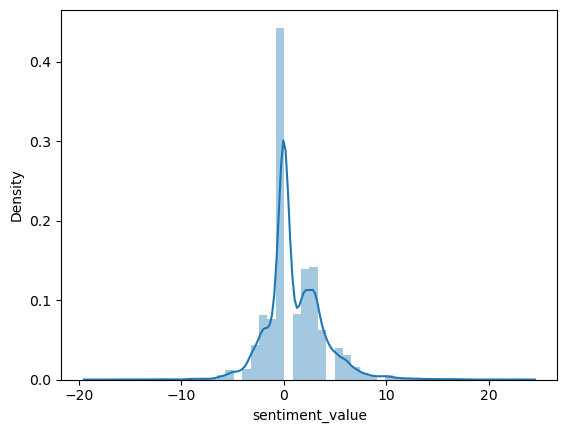

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

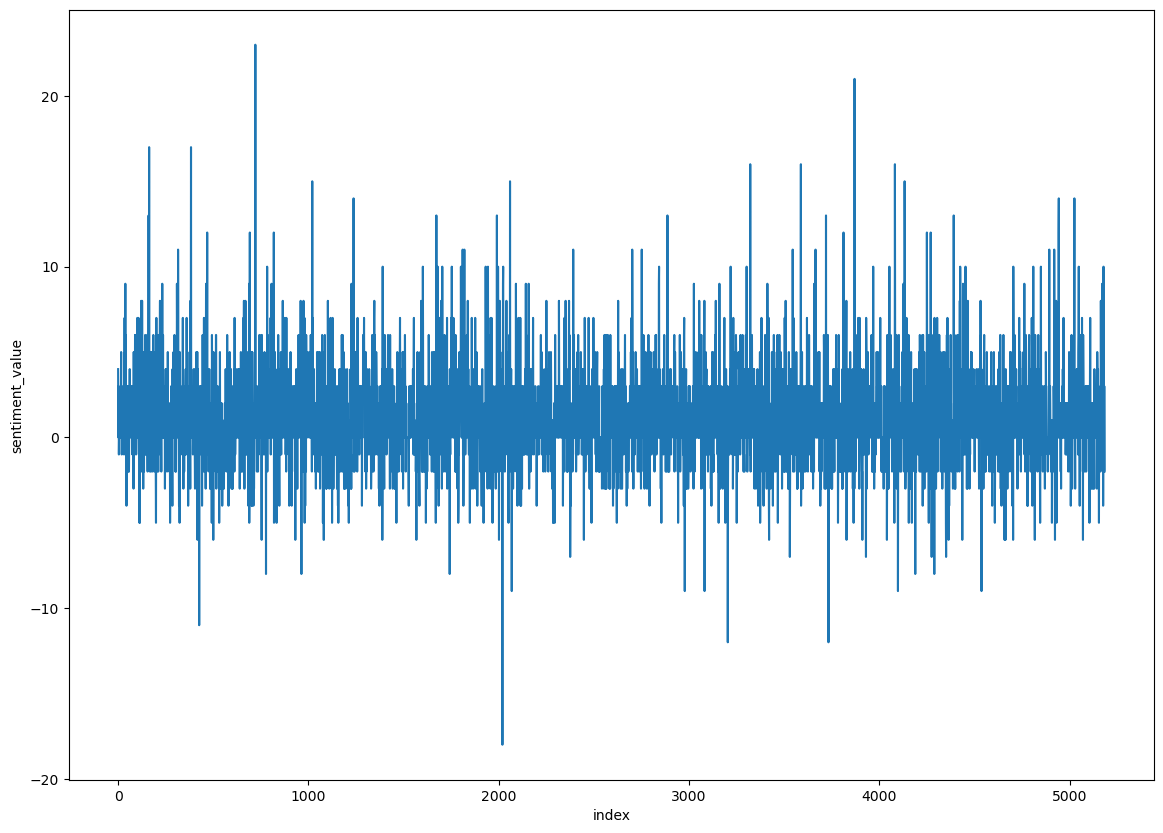

In [82]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

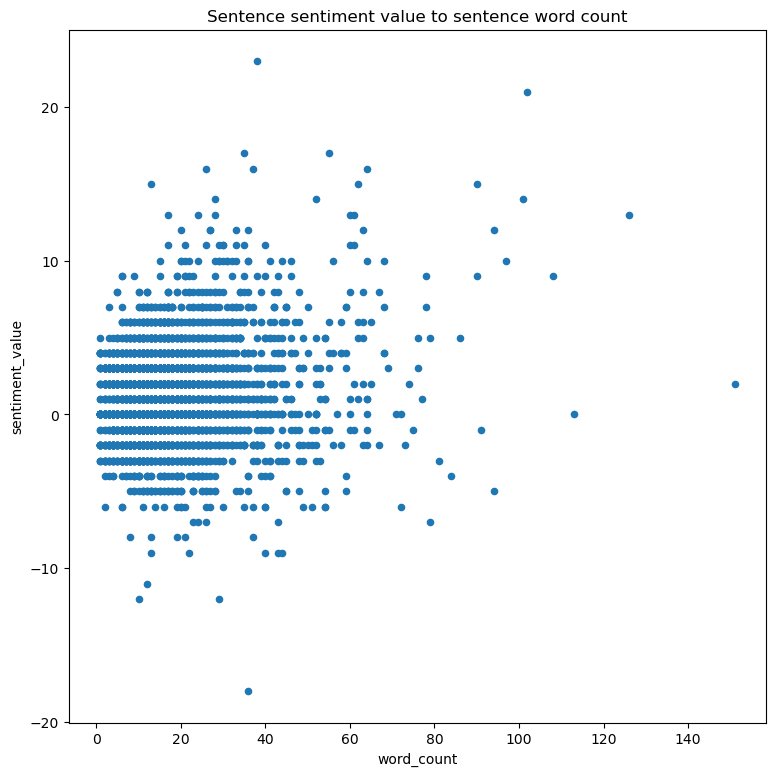

In [83]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [84]:
# PW for positive words 
# NW for Negative Words 

In [85]:
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [86]:
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [87]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

Words  Score
0            a+      1
1        abound      1
2       abounds      1
3     abundance      1
4      abundant      1
...         ...    ...
2001   youthful      1
2002       zeal      1
2003     zenith      1
2004       zest      1
2005      zippy      1

[2006 rows x 2 columns]

In [88]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

Words  Score
0        2-faced     -1
1        2-faces     -1
2       abnormal     -1
3        abolish     -1
4     abominable     -1
...          ...    ...
4778        zaps     -1
4779      zealot     -1
4780     zealous     -1
4781   zealously     -1
4782      zombie     -1

[4783 rows x 2 columns]

In [89]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [90]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [91]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [92]:
sent_df

sentence  sentiment_value  \
0     Not worth the money: Banks'book Oscilloscope G...                2   
1     I changed my mind: When I first reviewed this ...                1   
2     Unfortunately, the album doesn't have too much...               -1   
3     They initially impressed me due to the vocalis...                2   
4     The band doesn't have too much aside from that...                0   
...                                                 ...              ...   
5178  Living on the coast brings us close to this In...                0   
5179            Wonderful viewing for the whole family.                1   
5180      No guns, just a crab being eaten by a turtle.                0   
5181  guitar case: The case itself is GREAT, but it ...                0   
5182                                       Frustrating.               -1   

      word_count  index  
0             29      0  
1             19      1  
2              9      2  
3             21      3  
4             19      4  
...          ...    ...  
5178          11   5178  
5179           6   5179  
5180          10   5180  
5181          31   5181  
5182           1   5182  

[5183 rows x 4 columns]

In [93]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0     Not worth the money: Banks'book Oscilloscope G...                2   
1     I changed my mind: When I first reviewed this ...                1   
2     Unfortunately, the album doesn't have too much...               -1   
3     They initially impressed me due to the vocalis...                2   
4     The band doesn't have too much aside from that...                0   
...                                                 ...              ...   
5178  Living on the coast brings us close to this In...                0   
5179            Wonderful viewing for the whole family.                1   
5180      No guns, just a crab being eaten by a turtle.                0   
5181  guitar case: The case itself is GREAT, but it ...                0   
5182                                       Frustrating.               -1   

      word_count  index  
0             29      0  
1             19      1  
2              9      2  
3             21      3  
4             19      4  
...          ...    ...  
5178          11   5178  
5179           6   5179  
5180          10   5180  
5181          31   5181  
5182           1   5182  

[5183 rows x 4 columns]

In [94]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
692   Apparently it works with houses that have the ...                8   
721   THE BEST MOVIE: Hey, I just wanna say that thi...                8   
1023  This case was small, easy to carry, protective...                8   
2059  maybe it was just mine but overall i still thi...                9   
5170  bemused and confused......: ...by some of the ...                9   

      word_count  index  
692           94    692  
721           38    721  
1023          59   1023  
2059          62   2059  
5170          90   5170

In [95]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
2977  While Sam Micawh, the protagonist, certainly c...               -6   
2068  : The fellowship of the uninteresting and the ...               -6   
1617  I won't even get into the hopeless lack of key...               -5   
2111  flight of the intruder: can not play dvd in my...               -5   
754   It's hard to get behind a character who hates ...               -5   

      word_count  index  
2977          44   2977  
2068          43   2068  
1617          20   1617  
2111          52   2111  
754           40    754

In [96]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    5183.000000
mean        0.374301
std         1.343815
min        -6.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: sentiment_value, dtype: float64

In [97]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
2   Unfortunately, the album doesn't have too much...               -1   
8   I followed the instructions carefully but in t...               -1   
10    It took 2 weeks for my repairs to prove futile.               -1   
24  His research has revealed a much more complex ...               -1   
25  Governor Hutchinson's tenure during this perio...               -2   

    word_count  index  
2            9      2  
8           11      8  
10          10     10  
24          16     24  
25          52     25

In [98]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
25    Governor Hutchinson's tenure during this perio...               -2   
29    needs parts: My first gopher lost a suction cu...               -2   
31    Apparently it will not handle five pound loads...               -2   
44    I have to say I was confused when I got it and...               -2   
57    I don't know what else could possibly be wrong...               -2   
...                                                 ...              ...   
5052  But I found these videos damn near impossible ...               -2   
5069  Shouldn't it be clear to everyone (since at mo...               -3   
5103  Most of us already have helpless guilt from re...               -2   
5153  : This vacuum sucks and I don't mean that lite...               -2   
5175  The balances and tempi are usually wrong in Ri...               -2   

      word_count  index  
25            52     25  
29            20     29  
31            75     31  
44            36     44  
57            16     57  
...          ...    ...  
5052          10   5052  
5069          72   5069  
5103          23   5103  
5153          18   5153  
5175          13   5175  

[307 rows x 4 columns]

In [99]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

25     Governor Hutchinson's tenure during this perio...
29     needs parts: My first gopher lost a suction cu...
31     Apparently it will not handle five pound loads...
44     I have to say I was confused when I got it and...
57     I don't know what else could possibly be wrong...
77     This seems to helps keep bottom from being dam...
110                          The thing rattles and hums.
111     I even shock mounted it but still is very noisy.
114    Gives metalcore a bad name: I'm really sick of...
124    So I'm sorry that I wasted my money on this al...
132    The aaa batteries last a LONG time.If the prob...
199    Nigg* over and over and over to annoying crapt...
204    Tony is slowly being poisoned by the palladium...
221    cheap and flimsy: I know you get what you pay ...
273    Weak Acting and Screen Play: This is a horribl...
285    He explained that it interferred with the harn...
320    : According to Lucille Ball's autobiography, "...
323    Also, the plot is a litt

In [100]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

["Governor Hutchinson's tenure during this period of history was at the focal point of colonial uprising and Dr. Walmsley reveals to the reader an understanding of this man's social stance, governmental allegiances, and his true stature as a statesman as Hutchinson rises and falls through the American political landscape of the times.",
 'needs parts: My first gopher lost a suction cup while getting a sack of sugar of a grocery store shelf.',
 "Apparently it will not handle five pound loads as advertised.My second gopher (needed after the first lost an irreplacable suction cup) lost both suction cups while trying to pick up a wrench from a rough concrete floor.I will not buy another gopher until Ontel provides replacement suction cups (preferably free since I've bought two of them and they both failed in the same manner).It seems Ontel's opinion is what do you expect for ten bucks.",
 'I have to say I was confused when I got it and thought I might have ordered it in error but it really

In [101]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

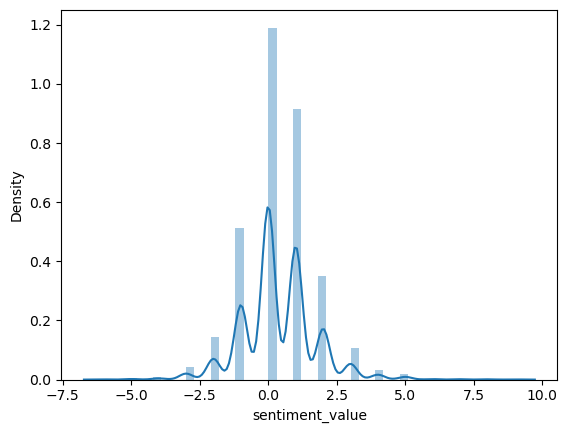

In [102]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

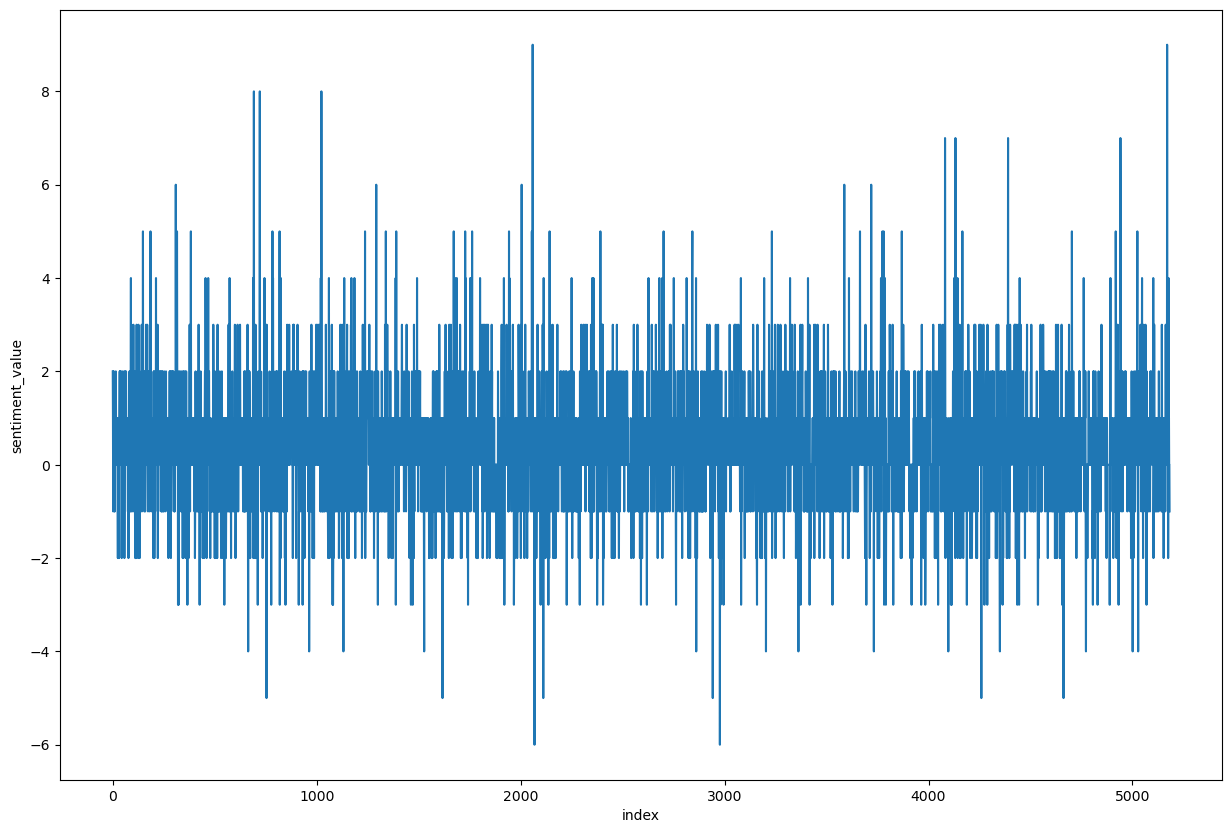

In [103]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

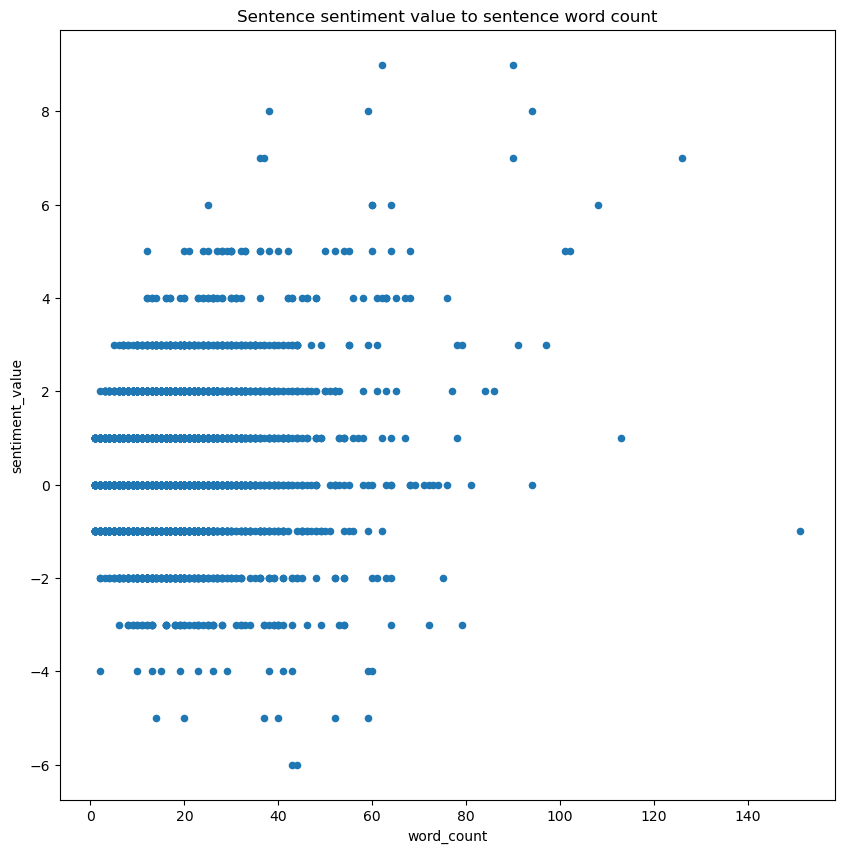

In [104]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

##### Positive and Negative words can't give us better results for sentimental analysis as compared to afinn(Afinn dataset) which gives us better analysis.